# lowpass butterworth

In [ ]:
!pip install mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mne #library untuk pemrosesan sinyal elektroensefalografi (EEG)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 47.4 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

Mounted at /content/drive
/content/drive/MyDrive/TA


In [ ]:
file1 = "/content/drive/MyDrive/TA/EDF/chb05_13.edf"
data1 = mne.io.read_raw_edf(file1) # membaca file edf dan menyimpannya di data1
data1

Extracting EDF parameters from /content/drive/MyDrive/TA/EDF/chb05_13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-3-3c6f315d4026>:2: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  data1 = mne.io.read_raw_edf(file1) # membaca file edf dan menyimpannya di data1


<RawEDF | chb05_13.edf, 23 x 921600 (3600.0 s), ~27 KiB, data not loaded>

In [ ]:
# Mendapatkan data dan informasi dari file EDF
data, times = data1.get_data(return_times=True)  # Mengambil data EEG dan waktu
channel_names = data1.ch_names  # Mendapatkan nama channel

In [ ]:
# Membuat DataFrame dengan data EEG dan waktu
df1 = pd.DataFrame(data.T, columns=channel_names)  # Transpose data sehingga sesuai dengan format DataFrame
df1['Time'] = times  # Menambahkan kolom waktu
df1.head()

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,Time
0,-7.228327e-06,-3.965812e-05,-5.333333e-05,-4.942613e-05,1.013919e-04,-1.631258e-04,-7.833944e-05,-9.572650e-06,6.505495e-05,-4.395604e-05,...,-5.294261e-05,2.910867e-05,-1.334310e-04,-6.700855e-05,5.372405e-05,-5.958486e-05,-8.849817e-05,3.614164e-05,-5.294261e-05,0.000000
1,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,0.003906
2,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,0.007812
3,1.953602e-07,5.860806e-07,1.953602e-07,1.953602e-07,1.953602e-07,5.860806e-07,1.758242e-06,-9.768010e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.953602e-07,5.860806e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,0.011719
4,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,5.860806e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-1.953602e-07,1.953602e-07,5.860806e-07,5.860806e-07,0.015625


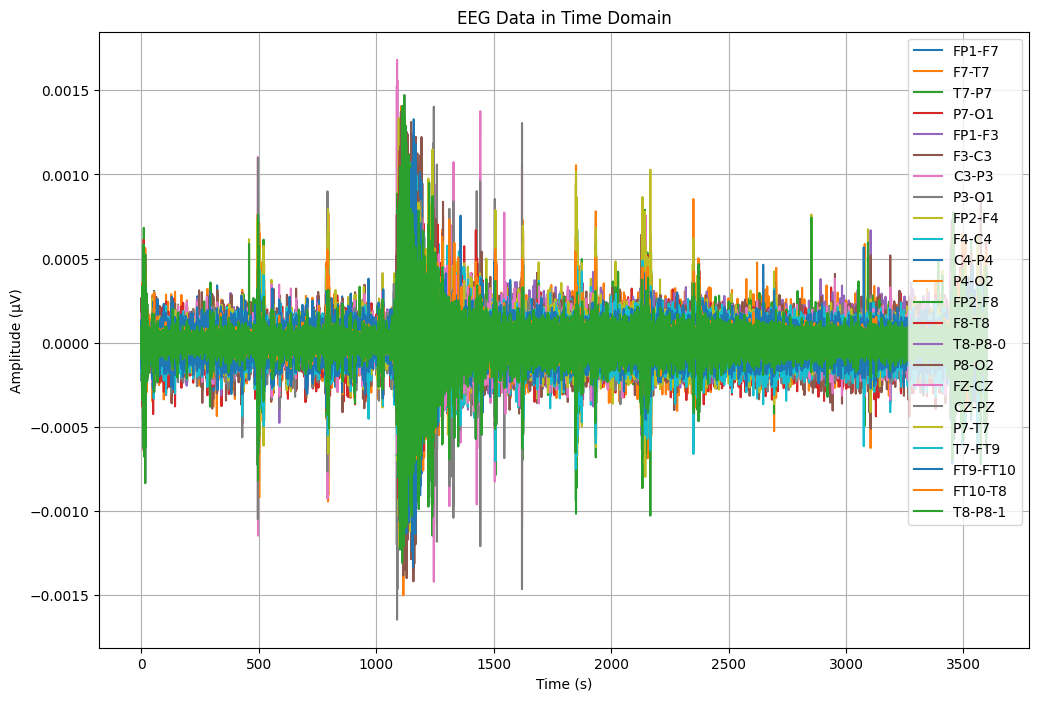

In [ ]:
# Time Domain
# Menentukan saluran EEG yang akan ditampilkan
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']  # Anda bisa memilih saluran lainnya
time = df1['Time']  # Kolom waktu

# Membuat plot
plt.figure(figsize=(12, 8))

# Looping untuk menampilkan masing-masing saluran
for channel in channels:
    plt.plot(time, df1[channel], label=channel)

# Menambahkan judul dan label
plt.title('EEG Data in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')

# Menampilkan grid dan plot
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd

# Load data into a DataFrame (asuming it's loaded already)
# df = pd.read_csv("eeg_data.csv")  # Contoh jika data dalam bentuk CSV

# Menentukan sample rate (misalkan 256 Hz)
sample_rate = 256  # Sesuaikan dengan sample rate data kamu

# Konversi waktu ke indeks data (dalam sampel)
start_time_seconds = 1086   # Waktu mulai (15:05:00) dalam detik dari 14:43:12
end_time_seconds = 1196    # Waktu akhir (15:10:00) dalam detik dari 14:43:12

start_index = int(start_time_seconds * sample_rate)
end_index = int(end_time_seconds * sample_rate)

# Potong data berdasarkan rentang waktu
df_cut = df1.iloc[start_index:end_index]

df_cut.to_csv("/content/drive/MyDrive/TA/ini_epilepsi_aja_chb05_13.csv", index=False)

In [ ]:
# import data yang sudah dipotong
TA1 = pd.read_csv("/content/drive/MyDrive/TA/ini_epilepsi_aja_chb05_13.csv")
TA1.head()

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,Time
0,0.000033,-0.000241,-5.860806e-07,1.953602e-07,-0.000221,1.191697e-05,1.953602e-07,1.953602e-07,0.000096,0.000014,...,0.000037,-0.000105,0.000028,-0.000099,9.768010e-07,0.000129,-0.000042,-0.000017,0.000037,1086.000000
1,0.000045,-0.000217,-2.539683e-06,1.953602e-07,-0.000174,-5.860806e-07,1.953602e-07,1.953602e-07,0.000067,0.000024,...,0.000003,-0.000094,0.000033,-0.000085,2.930403e-06,0.000125,-0.000084,0.000050,0.000003,1086.003906
2,0.000109,-0.000203,4.884005e-06,1.953602e-07,-0.000102,1.347985e-05,1.953602e-07,1.953602e-07,-0.000028,0.000074,...,0.000015,-0.000099,0.000039,-0.000069,-4.493284e-06,0.000117,-0.000058,0.000033,0.000015,1086.007812
3,0.000170,-0.000178,8.009768e-06,1.953602e-07,-0.000024,2.520147e-05,1.953602e-07,1.953602e-07,-0.000035,0.000053,...,0.000030,-0.000101,0.000037,-0.000059,-7.619048e-06,0.000124,-0.000053,0.000012,0.000030,1086.011719
4,0.000202,-0.000102,-9.768010e-07,1.953602e-07,0.000092,6.837607e-06,1.953602e-07,1.953602e-07,0.000084,-0.000012,...,-0.000032,-0.000052,0.000025,-0.000013,1.367521e-06,0.000074,-0.000060,0.000072,-0.000032,1086.015625


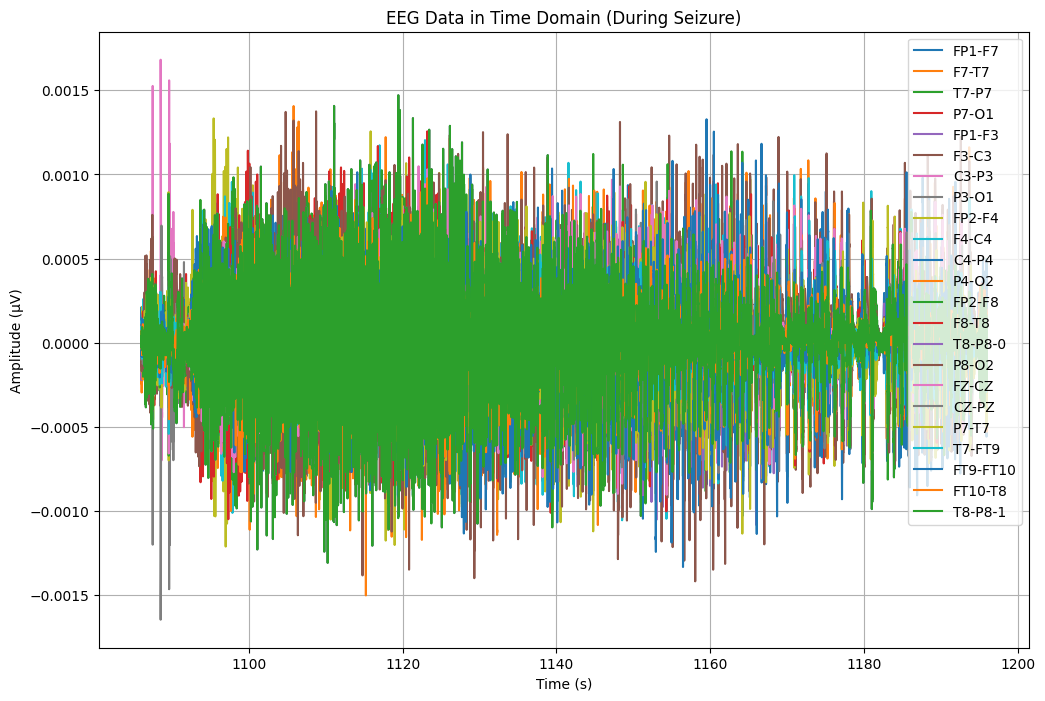

In [ ]:
# menampilkan data yang sudah dipotong dalam domain time
# Menentukan saluran EEG yang akan ditampilkan
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Mengambil data waktu dari kolom 'Time'
time = TA1['Time']

# Membuat plot
plt.figure(figsize=(12, 8))

# Looping untuk menampilkan masing-masing saluran EEG yang dipilih
for channel in channels:
    if channel in TA1.columns:  # Memastikan saluran ada dalam data
        plt.plot(time, TA1[channel], label=channel)

# Menambahkan judul dan label
plt.title('EEG Data in Time Domain (During Seizure)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')

# Menampilkan grid dan plot
plt.grid(True)
plt.show()


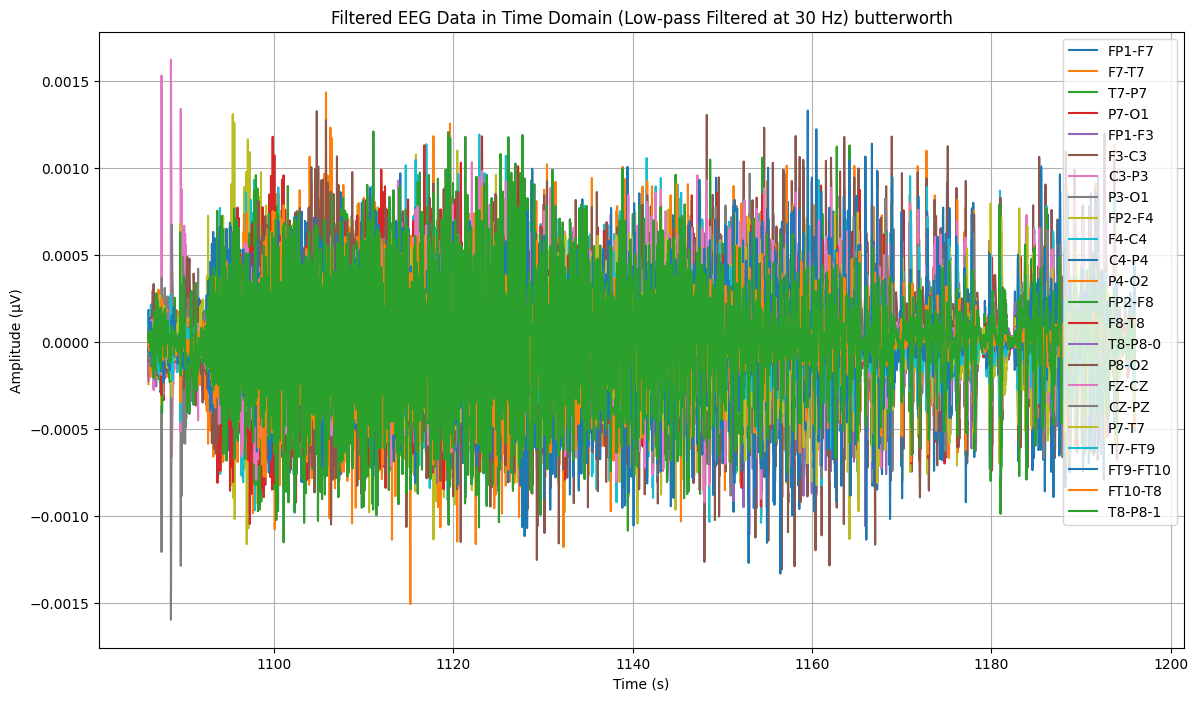

In [ ]:
from scipy.signal import butter, filtfilt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Fungsi untuk membuat filter low-pass
def low_pass_filter(data, cutoff, sampling_rate, order=5):
    nyquist = 0.5 * sampling_rate  # Frekuensi Nyquist
    normal_cutoff = cutoff / nyquist  # Normalisasi frekuensi cutoff
    b, a = butter(order, normal_cutoff, btype='low', analog=False)  # Koefisien filter
    filtered_data = filtfilt(b, a, data, axis=0)  # Terapkan filter pada data (axis=0 untuk kolom)
    return filtered_data

# Parameter untuk filter
cutoff_freq = 30  # Frekuensi cutoff dalam Hz
sampling_rate = 256  # Frekuensi sampling (dalam data EEG Anda)
filter_order = 4  # Orde filter

# Mengambil data waktu dan sinyal EEG dari data yang sudah dipotong (TA1)
time = TA1['Time'].values  # Kolom waktu
eeg_columns = TA1.columns[:-1]  # Semua kolom kecuali 'Time' (saluran EEG)
eeg_data = TA1[eeg_columns].values  # Data EEG

# Terapkan filter pada data EEG
filtered_data = low_pass_filter(eeg_data, cutoff_freq, sampling_rate, filter_order)

# Membuat DataFrame dari data yang telah difilter
filtered_df = pd.DataFrame(filtered_data, columns=eeg_columns)
filtered_df['Time'] = time  # Menambahkan kolom waktu ke data yang telah difilter

# Pilih beberapa atau semua saluran EEG untuk ditampilkan
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1',
            'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8', 'T8-P8-0', 'P8-O2',
            'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Membuat plot untuk semua saluran EEG dalam satu gambar
plt.figure(figsize=(14, 8))

for channel in channels:
    if channel in filtered_df.columns:  # Memastikan saluran ada dalam data
        plt.plot(filtered_df['Time'], filtered_df[channel], label=channel)  # Menampilkan data yang sudah difilter

# Memberikan judul dan label pada plot
plt.title('Filtered EEG Data in Time Domain (Low-pass Filtered at 30 Hz) butterworth')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')  # Menampilkan legenda untuk setiap saluran
plt.grid(True)
plt.show()


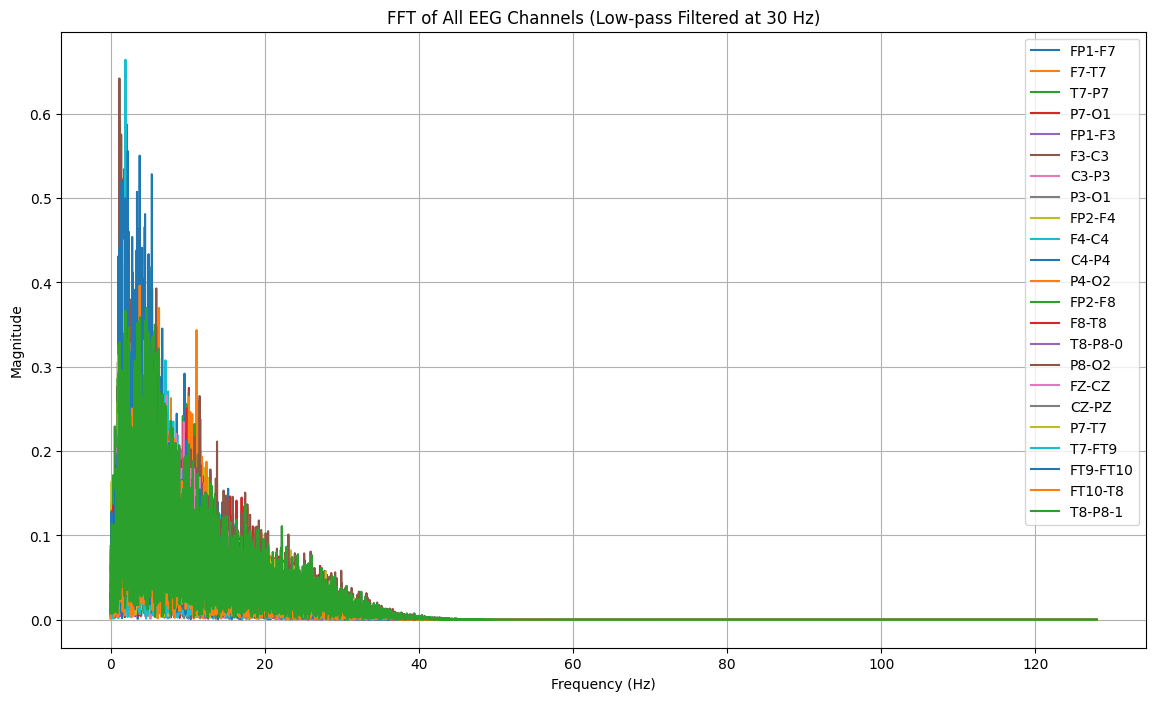

In [ ]:
# Fungsi untuk melakukan FFT dan mengembalikan frekuensi serta magnitude
def compute_fft(signal, sampling_rate):
    N = len(signal)  # Panjang sinyal
    T = 1.0 / sampling_rate  # Interval sampling
    fft_vals = np.fft.fft(signal)  # Menghitung FFT
    fft_freqs = np.fft.fftfreq(N, T)  # Frekuensi
    fft_vals = np.abs(fft_vals[:N // 2])  # Magnitude (frekuensi positif saja)
    fft_freqs = fft_freqs[:N // 2]  # Frekuensi positif saja
    return fft_freqs, fft_vals

# Sampling rate
sampling_rate = 256  # Misal 256 Hz

# Pilih beberapa atau semua saluran EEG untuk ditampilkan
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1',
            'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8', 'T8-P8-0', 'P8-O2',
            'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Membuat plot untuk semua saluran EEG dalam satu gambar
plt.figure(figsize=(14, 8))

for channel in channels:
    if channel in filtered_df.columns:  # Memastikan saluran ada dalam data
        signal = filtered_df[channel].values  # Mengambil sinyal dari saluran EEG
        fft_freqs, fft_vals = compute_fft(signal, sampling_rate)  # Menghitung FFT
        plt.plot(fft_freqs, fft_vals, label=channel)  # Menambahkan ke plot

# Memberikan judul dan label pada plot
plt.title('FFT of All EEG Channels (Low-pass Filtered at 30 Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend(loc='upper right')  # Menampilkan legenda untuk setiap saluran
plt.grid(True)
plt.show()


In [ ]:
# Fungsi untuk menentukan label kejang atau tidak
def label_seizure(row):
    if row['Time'] < 1088:
        return "tidak kejang"
    elif 1088 <= row['Time'] < 1239:
        return "kejang"
    else:
        return "tidak kejang"

# Menyalin data1 ke df1 dan menambahkan kolom 'seizure' berdasarkan fungsi di atas
TA_1 = filtered_df.copy()
TA_1['seizure'] = filtered_df.apply(label_seizure, axis=1)

# Menampilkan hasil
print(TA_1[['Time', 'seizure', 'FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']].head())

         Time       seizure    FP1-F7     F7-T7     T7-P7     P7-O1  \
0  968.000000  tidak kejang  0.000046  0.000129  0.000028 -0.000206   
1  968.003906  tidak kejang  0.000045  0.000130  0.000034 -0.000208   
2  968.007812  tidak kejang  0.000044  0.000130  0.000039 -0.000210   
3  968.011719  tidak kejang  0.000044  0.000128  0.000043 -0.000210   
4  968.015625  tidak kejang  0.000044  0.000123  0.000046 -0.000209   

         FP1-F3     F3-C3     C3-P3     P3-O1  ...     F8-T8   T8-P8-0  \
0 -2.072132e-07  0.000023  0.000048 -0.000072  ... -0.000018 -0.000002   
1 -7.916793e-08  0.000029  0.000042 -0.000070  ... -0.000017 -0.000006   
2  1.611014e-07  0.000034  0.000036 -0.000067  ... -0.000017 -0.000009   
3  6.197229e-07  0.000038  0.000029 -0.000063  ... -0.000016 -0.000011   
4  1.356970e-06  0.000040  0.000021 -0.000058  ... -0.000015 -0.000010   

      P8-O2     FZ-CZ     CZ-PZ     P7-T7    T7-FT9  FT9-FT10   FT10-T8  \
0 -0.000050 -0.000108 -0.000007 -0.000028 -0.000062 -

In [ ]:
# Simpan data yang sudah dilabel jadi kejang dan tidak kejang
TA_1.to_csv("/content/drive/MyDrive/TA/butterworth_lowpass_chb05_13.csv", index=False)

In [ ]:
# mengklasifikasikan menggunakan random forest

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier # Make sure to import RandomForestClassifier
from sklearn.model_selection import train_test_split # Import the function from the correct module

# Misalkan df adalah dataframe yang Anda miliki, dengan kolom 'seizure' yang berisi label "kejang" dan "tidak kejang"
# Contoh data:
# df = pd.read_csv('data.csv')

# Menentukan fitur (X) dan label (y)
X = TA_1.drop(['Time', 'seizure'], axis=1)  # Menghapus kolom 'Time' dan 'seizure' dari fitur
y = TA_1['seizure']  # Label target

# Membagi data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Membuat dan melatih model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Memprediksi label pada data pengujian
y_pred = model.predict(X_test)

# Import the necessary module
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,y_pred))


# Evaluasi model
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      kejang       1.00      0.97      0.98      7779
tidak kejang       0.98      1.00      0.99     12241

    accuracy                           0.99     20020
   macro avg       0.99      0.98      0.98     20020
weighted avg       0.99      0.99      0.99     20020

Akurasi: 0.9853646353646354
Laporan Klasifikasi:
               precision    recall  f1-score   support

      kejang       1.00      0.97      0.98      7779
tidak kejang       0.98      1.00      0.99     12241

    accuracy                           0.99     20020
   macro avg       0.99      0.98      0.98     20020
weighted avg       0.99      0.99      0.99     20020

